In [2]:
# Importing Packages
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Importing Keras Dataset
data = keras.datasets.fashion_mnist

# train and test data segregation
(train_images, train_labels), (test_images, test_labels) = data.load_data()

class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle Boot",
]

train_images = train_images / 255.0
test_images = test_images / 255.0

4423680/4422102 [==============================] - 4s 1us/step


In [4]:
# Create a object of model class
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
    ]
)
# Compile the model with MSE loss and Adam optimizer
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
# fitting the model
model.fit(train_images, train_labels, epochs=5)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/5
60000/60000 [==============================] - 8s 132us/sample - loss: 0.4980 - acc: 0.8253
Epoch 2/5
60000/60000 [==============================] - 8s 127us/sample - loss: 0.3717 - acc: 0.8662
Epoch 3/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3341 - acc: 0.8787
Epoch 4/5
60000/60000 [==============================] - 8s 130us/sample - loss: 0.3126 - acc: 0.8852
Epoch 5/5
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2928 - acc: 0.8929


10000/10000 [==============================] - 1s 79us/sample - loss: 0.3884 - acc: 0.8587
Accuracy:  0.8587


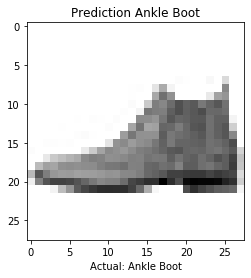

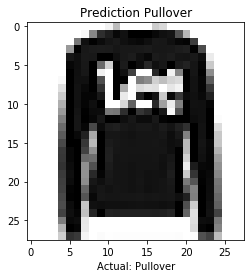

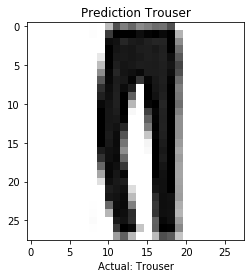

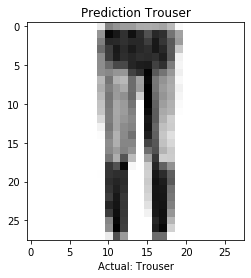

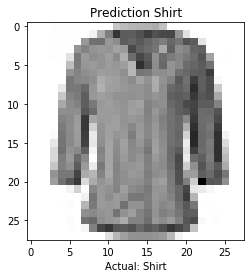

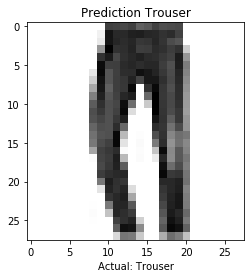

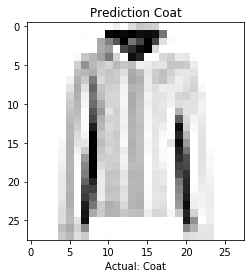

In [5]:
# model evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accuracy: ", test_acc)

prediction = model.predict(test_images)
# displaying predictions
for i in range(7):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual: " + class_names[test_labels[i]])
    plt.title("Prediction " + class_names[np.argmax(prediction[i])])
    plt.show()